In [20]:
import numpy as np
import pandas as pd

prices = []

last_timestamp = -100
for day in range(-1, 2):
    p = pd.read_csv(f'../../data/prices_round_2_day_{day}.csv', sep=';')
    p['timestamp'] = p['timestamp'] + last_timestamp + 100
    prices.append(p)

    last_timestamp = np.max(p['timestamp'])

prices = pd.concat(prices, axis=0, ignore_index=True)
prices

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1
...,...,...,...,...,...,...,...,...
29998,2999800,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,1
29999,2999900,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,1
30000,3000000,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,1
30001,3000100,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,1


<Axes: >

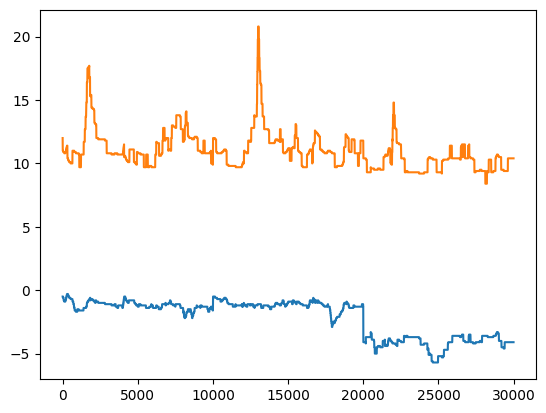

In [21]:
(prices['TRANSPORT_FEES'] + prices['IMPORT_TARIFF']).plot()
(prices['TRANSPORT_FEES'] + prices['EXPORT_TARIFF']).plot()

<Axes: >

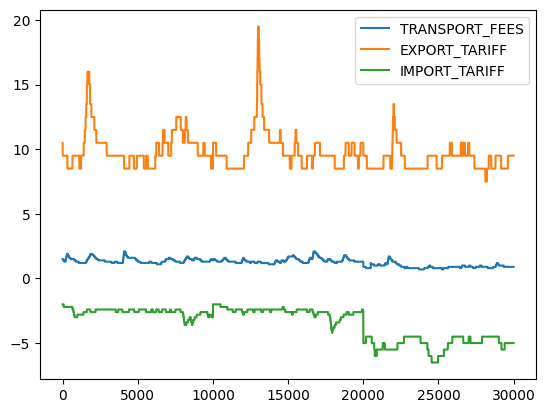

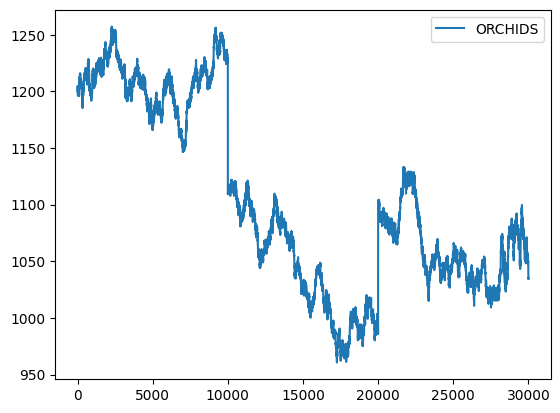

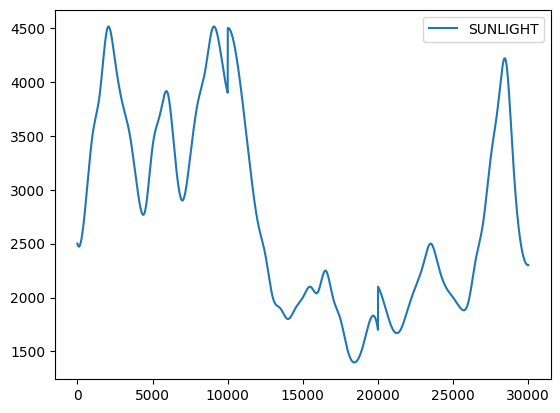

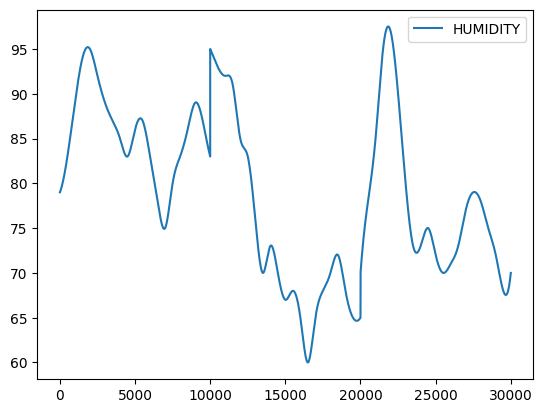

In [2]:
prices[['TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF']].plot()
prices[['ORCHIDS']].plot()
prices[['SUNLIGHT']].plot()
prices[['HUMIDITY']].plot()

                            OLS Regression Results                            
Dep. Variable:                ORCHIDS   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                 1.204e+04
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:05:19   Log-Likelihood:            -1.5826e+05
No. Observations:               30003   AIC:                         3.165e+05
Df Residuals:                   29997   BIC:                         3.166e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            659.5647      3.781    174.

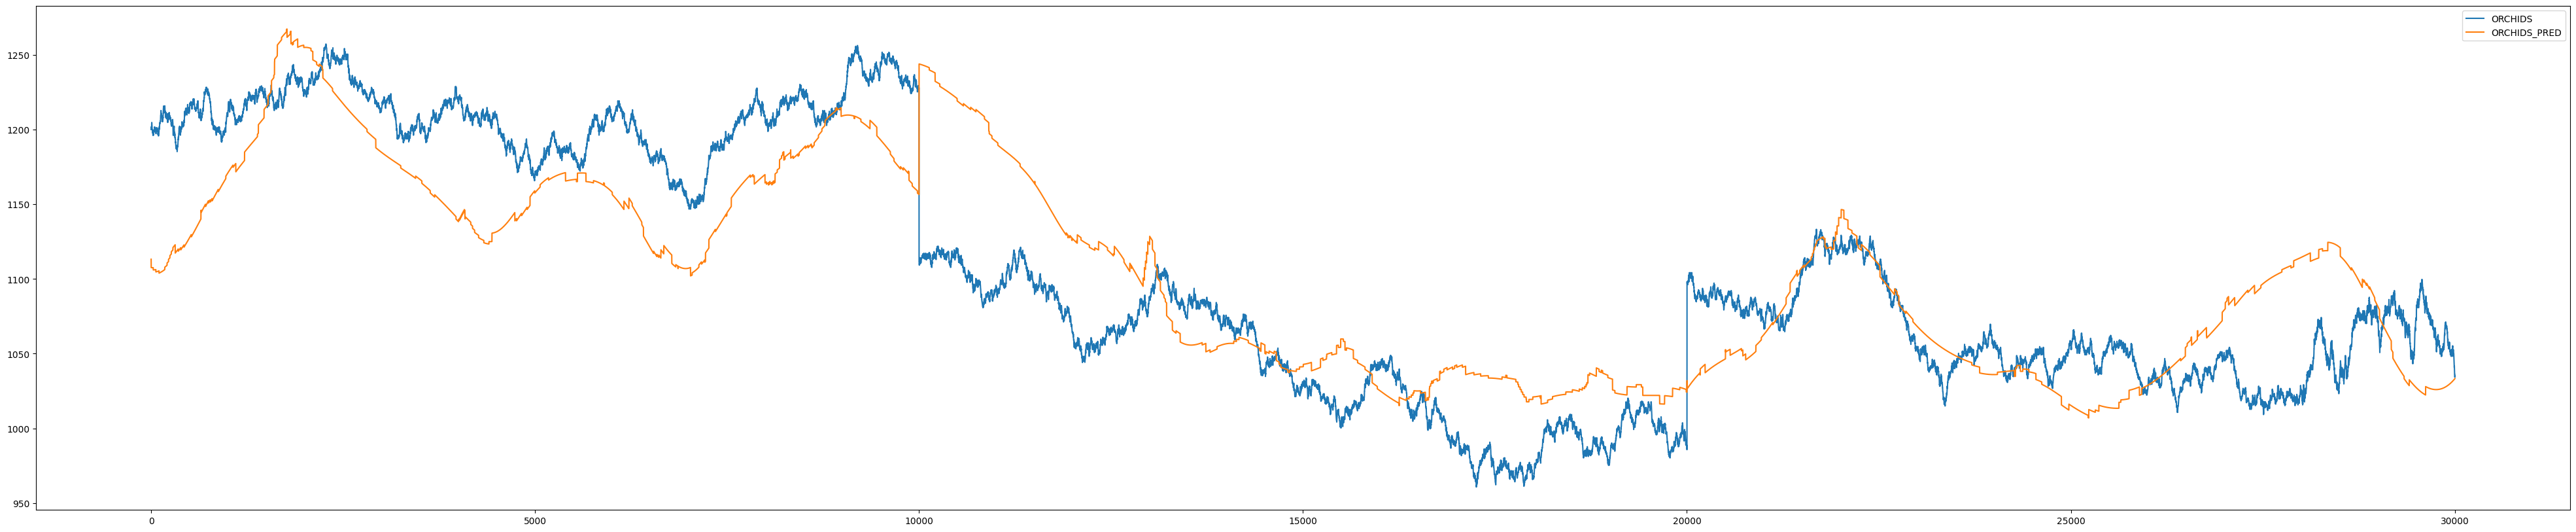

In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = prices[['TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']]
y = prices['ORCHIDS']
X = sm.add_constant(X)

model = sm.OLS(y, X, missing='drop').fit()
prices['ORCHIDS_PRED'] = model.predict(X)

print(model.summary())
print(model.params)

prices.plot(y=['ORCHIDS', 'ORCHIDS_PRED'], style='-', figsize=(50,10))
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from lazypredict.supervised import LazyRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.8,random_state=321)
reg = LazyRegressor(verbose=0)
out, predictions = reg.fit(X_train, X_test, y_train, y_test)
out

100%|██████████| 42/42 [00:54<00:00,  1.30s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003923 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 557
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 5
[LightGBM] [Info] Start training from score 1104.173917


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,1.00,1.00,1.71,1.25
ExtraTreeRegressor,1.00,1.00,2.20,0.03
KNeighborsRegressor,1.00,1.00,2.63,0.15
XGBRegressor,1.00,1.00,2.91,0.63
BaggingRegressor,1.00,1.00,3.53,0.30
RandomForestRegressor,1.00,1.00,3.59,2.03
DecisionTreeRegressor,1.00,1.00,4.07,0.06
HistGradientBoostingRegressor,1.00,1.00,4.27,0.28
LGBMRegressor,1.00,1.00,4.58,0.14


0.9623455037699306


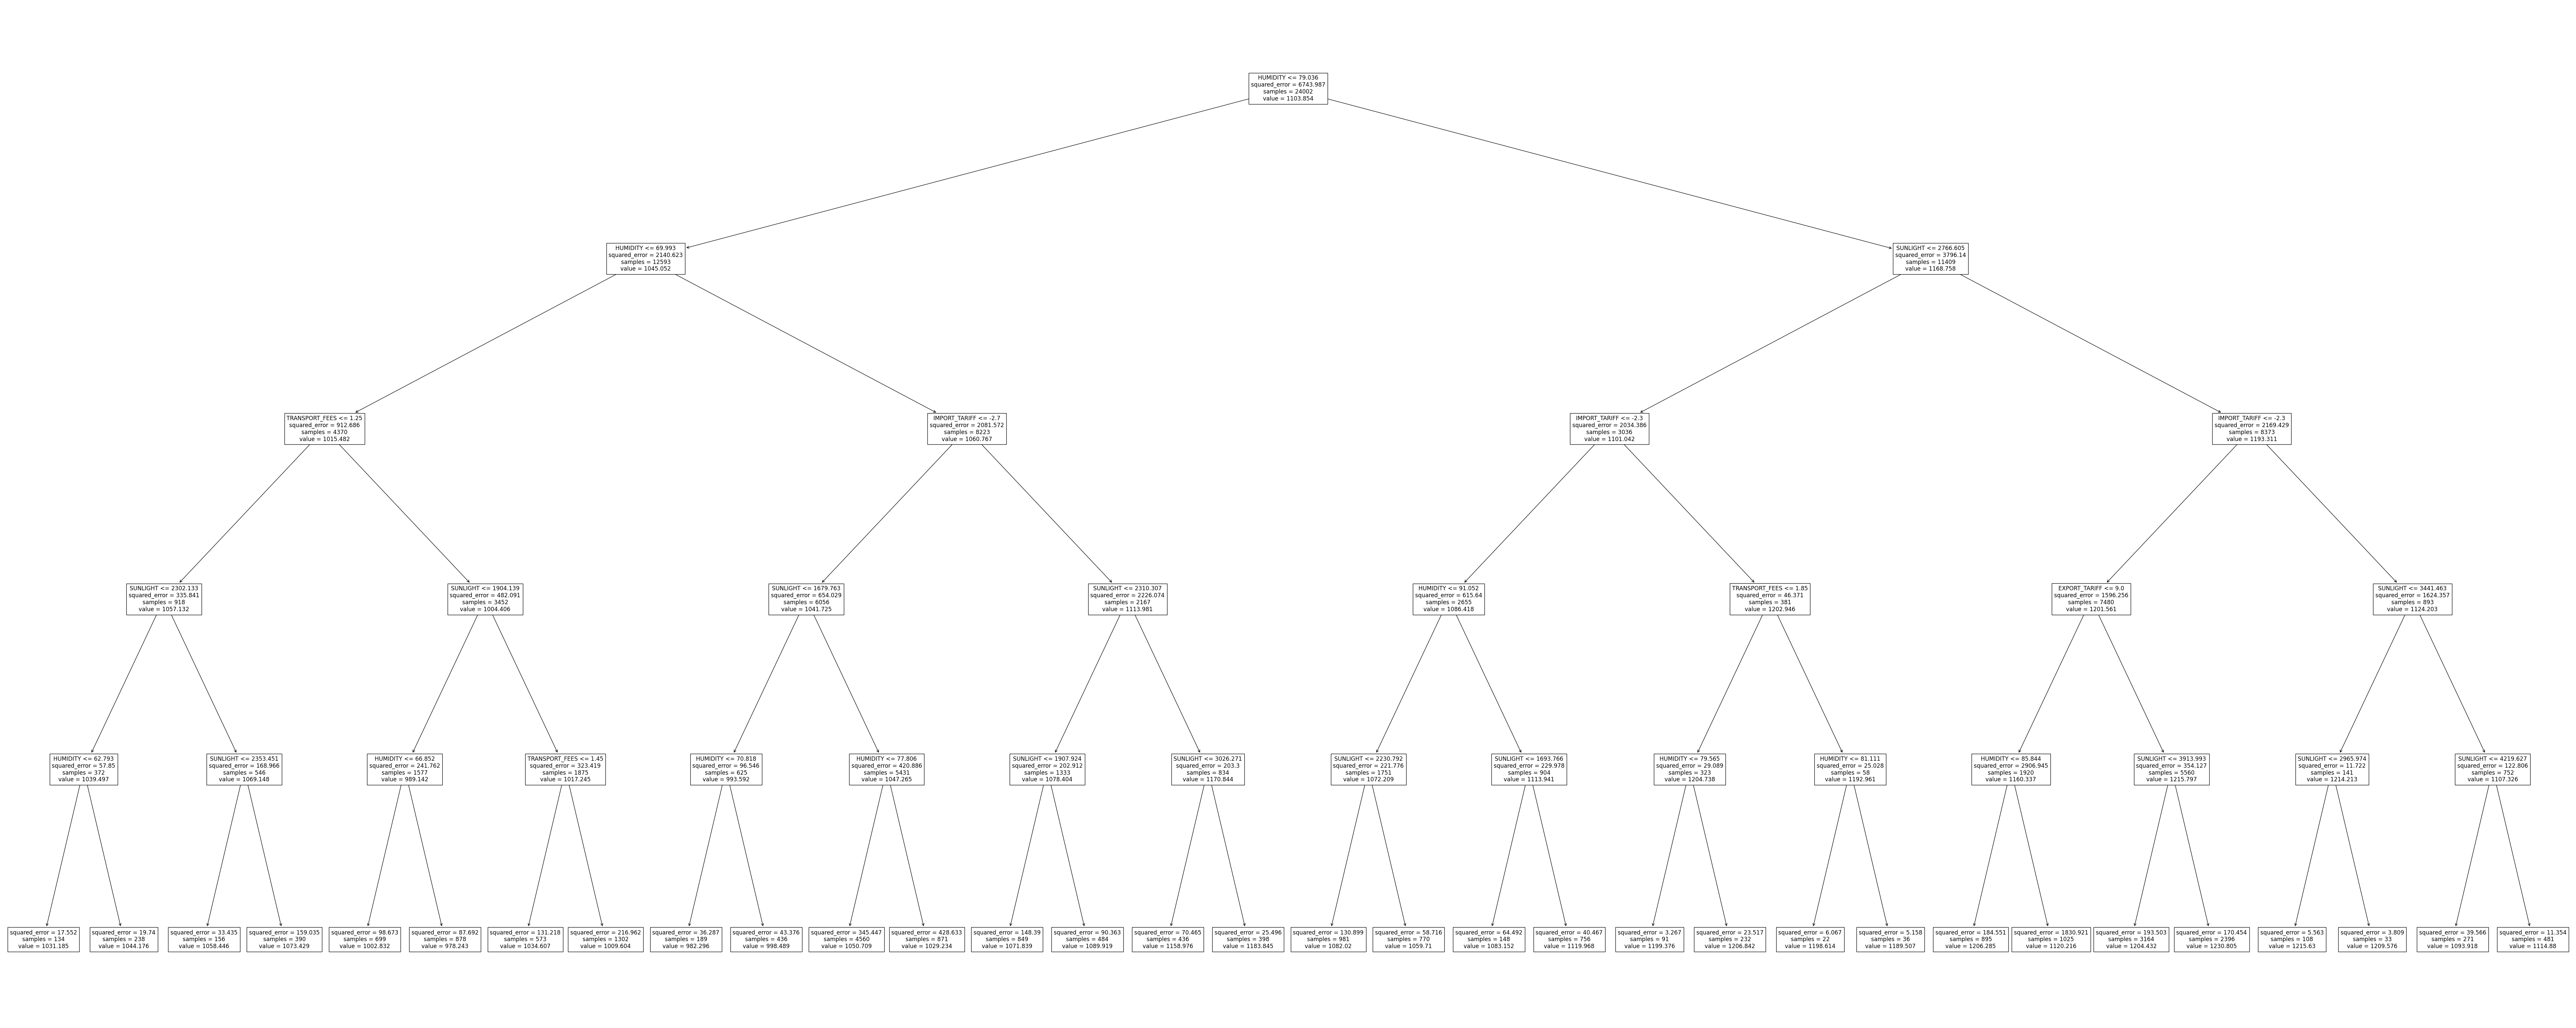

In [14]:
from sklearn import tree
from sklearn.model_selection import train_test_split

clf = tree.DecisionTreeRegressor(max_depth=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

clf = clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

f, ax = plt.subplots(figsize=(100, 40))
tree.plot_tree(clf, feature_names=['i', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY'], ax=ax)
plt.show()

In [ ]:
models = reg.provide_models(X_train, X_test, y_train, y_test)

tree.plot_tree(models['DecisionTreeRegressor'][1])
plt.show()

In [22]:
%matplotlib notebook

data = (prices['SUNLIGHT'] - prices['SUNLIGHT'].mean())

ps = np.abs(np.fft.fft(data))**2

time_step = 0.001
freqs = np.fft.fftfreq(data.size, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

<IPython.core.display.Javascript object>

<Axes: >

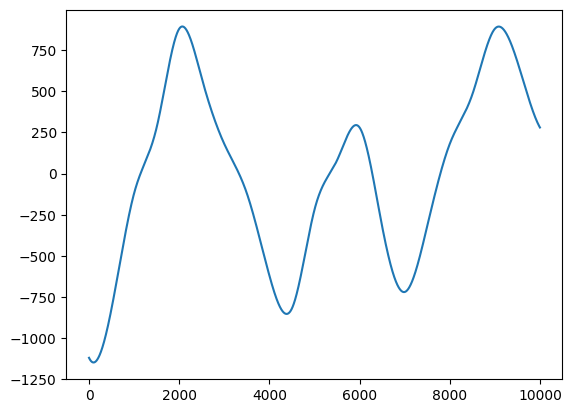

In [14]:
(prices['SUNLIGHT'] - prices['SUNLIGHT'].mean()).plot()

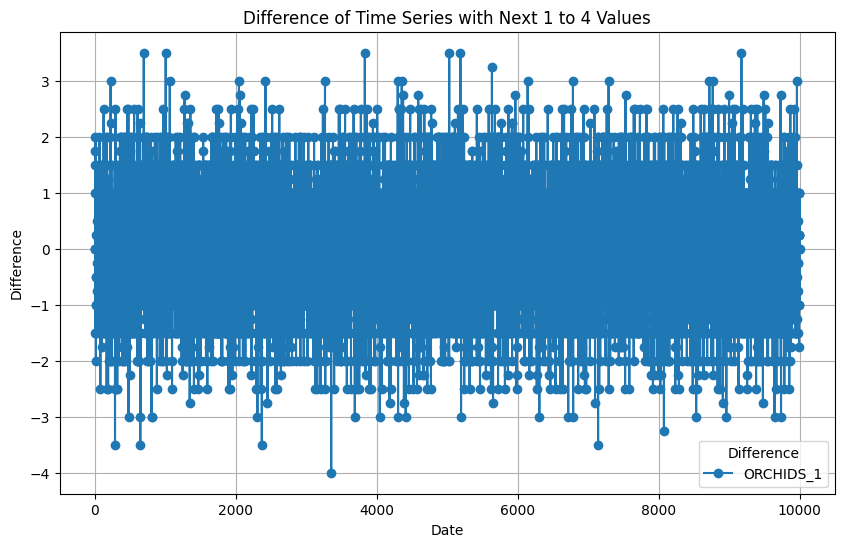

In [19]:
for i in range(1, 5):
    prices[f'ORCHIDS_{i}'] = prices['ORCHIDS'].diff(periods=i)

# Plot differences
prices.plot(y=[f'ORCHIDS_{i}' for i in range(1, 2)], marker='o', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Difference of Time Series with Next 1 to 4 Values')
plt.grid(True)
plt.legend(title='Difference')
plt.show()